I will approach this using the degree centrality with the thought that if the person that is most connected is removed the network will dismantle. I found a library called network_dismantler that I will use to analyze the network.

In [3]:
#install network_dismantling
!pip install network-dismantling

#Install torch_geometric (needed due to an error)
!pip install torch

   ---------------------------------------- 0.0/110.9 MB ? eta -:--:--
    --------------------------------------- 2.4/110.9 MB 13.4 MB/s eta 0:00:09
   -- ------------------------------------- 6.3/110.9 MB 16.8 MB/s eta 0:00:07
   -- ------------------------------------- 7.9/110.9 MB 15.7 MB/s eta 0:00:07
   --- ------------------------------------ 10.2/110.9 MB 12.8 MB/s eta 0:00:08
   ---- ----------------------------------- 13.1/110.9 MB 13.3 MB/s eta 0:00:08
   ----- ---------------------------------- 16.5/110.9 MB 13.7 MB/s eta 0:00:07
   ------- -------------------------------- 20.2/110.9 MB 14.3 MB/s eta 0:00:07
   -------- ------------------------------- 23.9/110.9 MB 14.8 MB/s eta 0:00:06
   --------- ------------------------------ 27.5/110.9 MB 15.2 MB/s eta 0:00:06
   ----------- ---------------------------- 31.5/110.9 MB 15.5 MB/s eta 0:00:06
   ------------ --------------------------- 35.1/110.9 MB 15.8 MB/s eta 0:00:05
   ------------- -------------------------- 38.5/110

In [7]:
import networkx as nx
import pandas as pd
from network_dismantling.dismanlter import NetworkDismantler, DegreeDismantling, BetweennessDismantling, CoreHDDismantling, GDMDismantling

Now to get the data imported, cleaned and graphed. This dataset is from operation Jake which is decribed by the site https://sites.google.com/site/ucinetsoftware/datasets/covert-networks/cocaine-smuggling as "In 2008, the group investigated was operating as a wholesale supplier and retail distributor of cocaine and heroin in a large distribution zone located in Madrid (Spain), where gypsy clans traditionally carry out similar activities. The group was in charge of acquiring, manipulating and selling the drugs in the gypsy quarter"

In [13]:
#Read in the data
smuggle = pd.read_csv("Cocaine Smuggling CSV/CSV/COCAINE_JAKE.csv", index_col= "Unnamed: 0")

In [15]:
#Now we make it into a networkx object
G = nx.from_pandas_adjacency(smuggle)

In [21]:
nx.degree_centrality(G) #The nodes with the most connections

{'ABFM': 0.32432432432432434,
 'AFM': 0.08108108108108109,
 'AIGC': 0.08108108108108109,
 'AMG': 0.02702702702702703,
 'CAR': 0.05405405405405406,
 'CHA': 0.02702702702702703,
 'DEJV': 0.08108108108108109,
 'DMN': 0.02702702702702703,
 'EYVT': 0.02702702702702703,
 'FAERH': 0.02702702702702703,
 'FFM': 0.24324324324324326,
 'FLMC': 0.2972972972972973,
 'H1': 0.05405405405405406,
 'H10': 0.02702702702702703,
 'H11': 0.02702702702702703,
 'H2': 0.02702702702702703,
 'H3': 0.02702702702702703,
 'H5': 0.02702702702702703,
 'H6': 0.02702702702702703,
 'H7': 0.02702702702702703,
 'H8': 0.02702702702702703,
 'H9': 0.02702702702702703,
 'JAGG': 0.02702702702702703,
 'JES': 0.32432432432432434,
 'JFM': 0.21621621621621623,
 'JHY': 0.02702702702702703,
 'JMBM': 0.02702702702702703,
 'M1': 0.02702702702702703,
 'M2': 0.02702702702702703,
 'M3': 0.05405405405405406,
 'MCM': 0.05405405405405406,
 'MRQ': 0.02702702702702703,
 'PR': 0.02702702702702703,
 'PRS': 0.02702702702702703,
 'RBM': 0.16216216

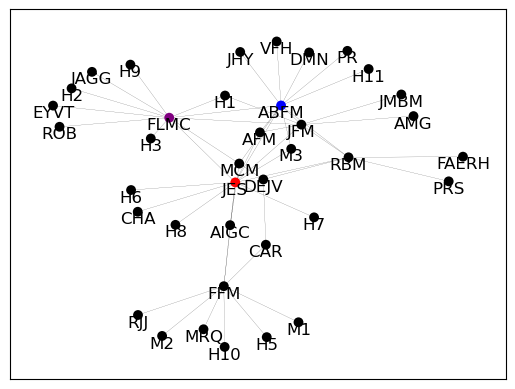

In [29]:
#And to draw the network
colors = ['black' for n in G]
colors[0] = 'blue'
colors[23] = 'red'
colors[11] = 'purple'
options = { 'node_color': colors,
            'node_size': 50,
             'linewidths': 0,
            'width': 0.1,
            'with_labels': True,
            'verticalalignment':'top'}
nx.draw_networkx(G, **options)

Now for the dismantling. First I printed a little blurb about the original graph. Then I set up the degree dismantler from network_dismantler, which dismantles the network based on degree centrality

In [31]:
#First just a little info about our network
print(f"Network: Cocaine Smuggling Operation Jake (N={G.number_of_nodes()}, E={G.number_of_edges()})")

Network: Cocaine Smuggling Operation Jake (N=38, E=50)


In [33]:
dismantler = NetworkDismantler(DegreeDismantling())

Now I am going to remove just one node and see how that will dismantle the network.

In [35]:
G_dismantled, removed = dismantler.dismantle(G, num_nodes=1)

# Results
original_lcc = len(max(nx.connected_components(G), key=len))
dismantled_lcc = len(max(nx.connected_components(G_dismantled), key=len))
reduction = (1 - dismantled_lcc/original_lcc) * 100

print(f"Removed nodes: {removed}")
print(f"LCC: {original_lcc} → {dismantled_lcc}")
print(f"Components: 1 → {nx.number_connected_components(G_dismantled)}")
print(f"LCC: {original_lcc} → {dismantled_lcc} ({reduction:.1f}% reduction)")

Removed nodes: ['ABFM']
LCC: 38 → 32
Components: 1 → 6
LCC: 38 → 32 (15.8% reduction)


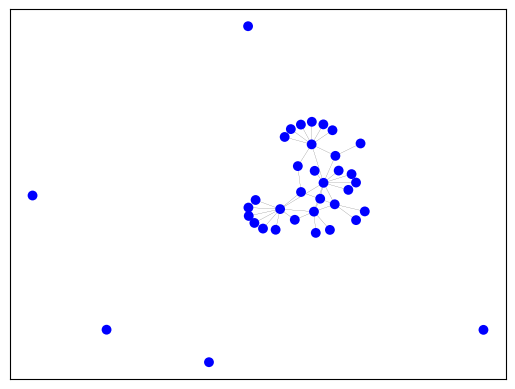

In [43]:
#Colored blue to correspond with the original graph
colors = ['blue' for n in G_dismantled]
options = { 'node_color': colors,
            'node_size': 50,
            'linewidths': 0,
            'width': 0.1,
            'with_labels': False}
nx.draw_networkx(G_dismantled, **options)

Doesn't completely dismantle the network, so lets try a betweenneess approach

In [45]:
#I am going to reinitialize the G object
G = nx.from_pandas_adjacency(smuggle)

In [47]:
dismantlerB = NetworkDismantler(BetweennessDismantling())

G_betweenness, removed = dismantlerB.dismantle(G, num_nodes=1)

original_lcc = len(max(nx.connected_components(G), key=len))
dismantled_lcc = len(max(nx.connected_components(G_betweenness), key=len))
reduction = (1 - dismantled_lcc/original_lcc) * 100

#Results
print(f"Removed nodes: {removed}")
print(f"LCC: {original_lcc} → {dismantled_lcc}")
print(f"Components: 1 → {nx.number_connected_components(G_betweenness)}")
print(f"LCC: {original_lcc} → {dismantled_lcc} ({reduction:.1f}% reduction)")

Removed nodes: ['JES']
LCC: 38 → 33
Components: 1 → 5
LCC: 38 → 33 (13.2% reduction)


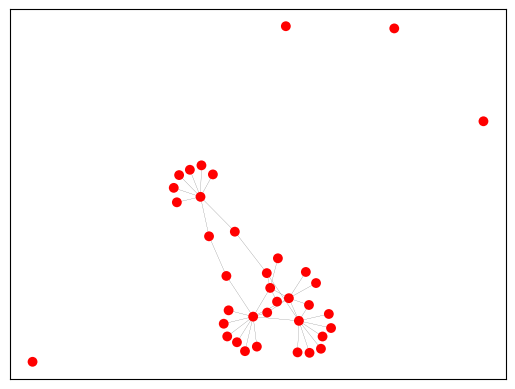

In [49]:
#colored red to correspond with the original graph
colors = ['red' for n in G_betweenness]
options = { 'node_color': colors,
            'node_size': 50,
            'linewidths': 0,
            'width': 0.1,
            'with_labels': False}
nx.draw_networkx(G_betweenness, **options)

Looks like removing 'ABFM' will decrease the maximum connections by 6, which is a 15% reduction, whereas removing 'JES' on decreases the maximum connections by 5.  

I see the 'FLMC' looks pretty connected, so I wanted to see what the effect of removing it would be.

In [51]:
#I am going to reinitialize the G object
G = nx.from_pandas_adjacency(smuggle)

In [54]:
G_copy = G.copy() # Create a copy of the graph to modify
G_copy.remove_node('FLMC') # Remove the node from the copy

original_lcc = len(max(nx.connected_components(G), key=len))
dismantled_lcc = len(max(nx.connected_components(G_copy), key=len)) # Analyze the modified copy
reduction = (1 - dismantled_lcc/original_lcc) * 100

In [56]:
print(f"LCC: {original_lcc} → {dismantled_lcc}")
print(f"Components: 1 → {nx.number_connected_components(G_copy)}")
print(f"LCC: {original_lcc} → {dismantled_lcc} ({reduction:.1f}% reduction)")

LCC: 38 → 31
Components: 1 → 7
LCC: 38 → 31 (18.4% reduction)


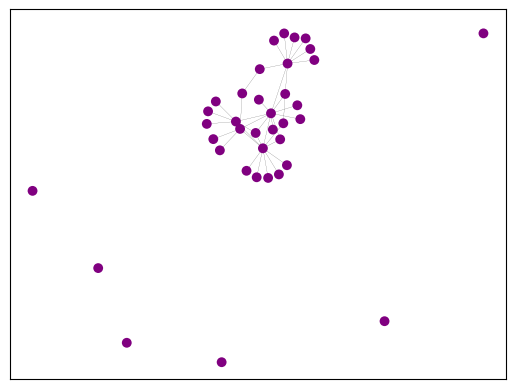

In [58]:
colors = ['purple' for n in G_copy]
options = { 'node_color': colors,
            'node_size': 50,
            'linewidths': 0,
            'width': 0.1,
            'with_labels': False}
nx.draw_networkx(G_copy, **options)

https://github.com/c0mm4nd/network-dismantling/blob/dev/examples/06_machine_learning_methods.py

Write up:
I have perfomed a dismantling analysis on a dataset collected via police investigations of a cocaine smuggling operation in Spain. This data was from the Jake group in 2008 which was operating in the gypsy quarter of Madrid. The data was loaded into a pandas dataframe, indexed by the column and then turned into a networkx object. Finally that networkx object was graphed (shown below). The blue node is the node with the highest degree centrality, and the red node is the node with the highest betweenness centrality. We can see from this graph that this is a pretty connected network, and the colored dots are the most connected nodes. Those most connected nodes were then removed to observe the effect on the network. Firstly, 1 node 'ABFM' was removed based on degree centrality. The removal of this node reduced the connections by about 16%. As seen in the visualization, were now have 5 outliers, and still an inner cluster. Then the node with the highest betweennness centrality was removed from the original network. This produced a network with 4 outliers and a reduction in connectivity of about 13%. Interestingly, removing the 'FLMC' node resulted in 6 outliers and an 18% reduction in connections, despite not having the highest degree or betweenness centralities. However, looking back at the original graph both the 'FLMC' and 'ABFM' are the main nodes (I will refer to as "leaders") for 2 of the 3 clusters. The betweenness node 'JES' is the only node that has direct connections to 2 of the cluster leaders, so if the network were to be dismantled, targeting the 'JES' node is the best option because while it does not reduce as many connections, it makes communications between the clusters more difficult because there is not longer a direct connection. On the other hand, if those clusters are resonsible for critical parts of the operation and are not cross trained on those tasks then perhaps removing one of the cluster leaders would lead to a better network dismantling. Determining the leader to remove could involve determining the most connections broken or which cluser has the most critical role in the operation.